# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [4]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [5]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

In [6]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

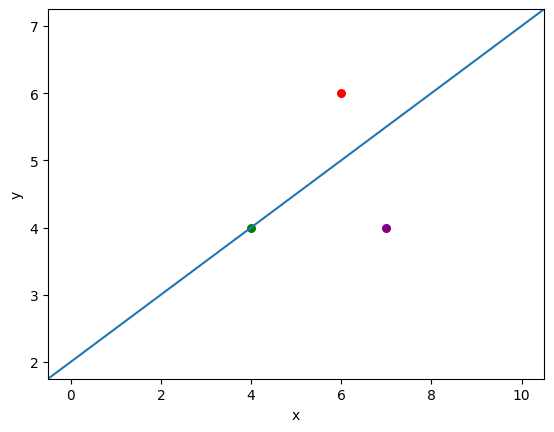

In [5]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [6]:
from random import uniform
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    T=[]
    for i in range(n):
        T.append((uniform(left,right),uniform(left,right)))
    return T

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [7]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

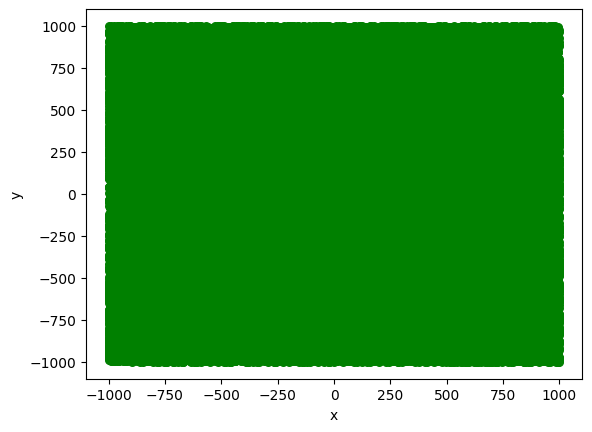

In [8]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [9]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

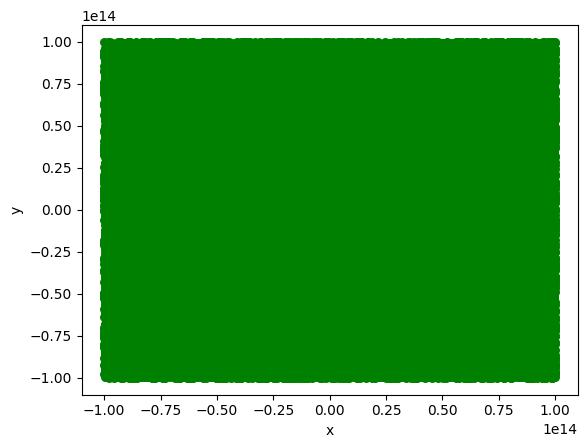

In [10]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [11]:
from math import cos,sin
def generate_circle_points(O, R, n = 100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    T=[]
    # x=r*cos(phi)-x0
    # y=r*sin(phi)-y0
    for i in range(n):
        phi=uniform(0,180)
        x=R*cos(phi)-O[0]
        y=R*sin(phi)-O[1]
        T.append((x,y))
    return T

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [12]:
points_c = generate_circle_points((0, 0), 100,1000)

Zwizualizuj wygenerowane punkty.

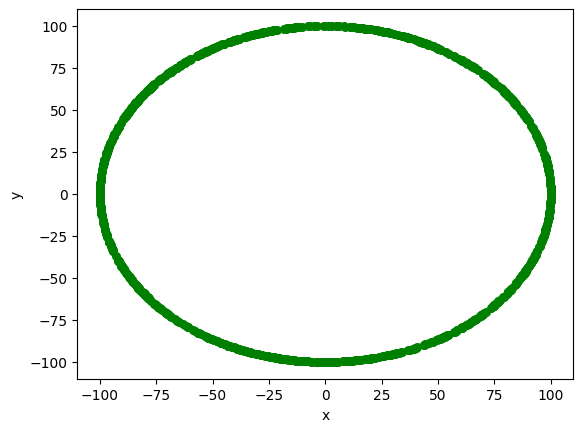

In [80]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [14]:
def generate_collinear_points(a, b, n=100):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na prostej ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek wektora tworzącego prostą
    :param b: krotka współrzędnych oznaczająca koniec wektora tworzącego prostą
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    T=[]

    # x0+t(x1-x0) e [-1000,1000]
    # t(x1-x0) e [-1000-x0,1000-x0] 
    # t e [-1000-x0/x1-x0,1000-x0/x1-x0] , x1-x0!=0
    # (x,y)= (x0,y0) + t(x1-x0,y1-y0)

    v=(b[0]-a[0],b[1]-a[1])

    for i in range(n):
        t=uniform((-1000-b[0])/(v[0]),(1000-b[0])/(v[0]))
        x=b[0]+t*v[0]
        y=b[1]+t*v[1]
        T.append((x,y))
    return T

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [15]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1),1000)

Zwizualizuj wygenerowane punkty.

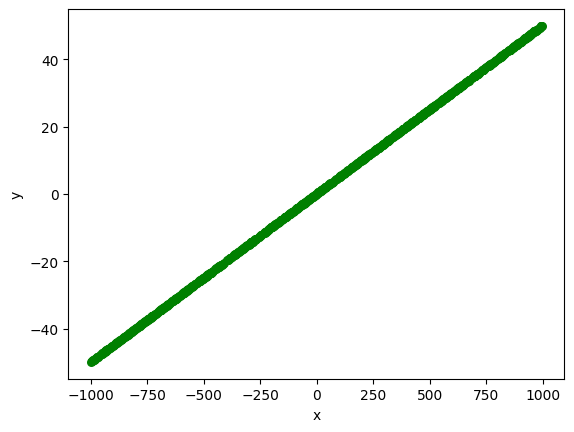

In [16]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [17]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.125s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [7]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    result=a[0]*b[1]*1 + a[1]*1*c[0] + 1*b[0]*c[1] - 1*b[1]*c[0] - a[1]*b[0]*1 - a[0]*1*c[1]
    return result

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [8]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    M=np.array([[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]])
    det=np.linalg.det(M)
    return det

Uzupełnij funkcje ```mat_det_2x2```

In [9]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    result = (a[0]-c[0])*(b[1]-c[1]) - (a[1]-c[1])*(b[0]-c[0])
    return result

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [10]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    M=np.array([[a[0]-c[0],a[1]-c[1]],[b[0]-c[0],b[1]-c[1]]])
    det=np.linalg.det(M)
    return det

Przetestujmy napisane powyżej funkcje.

In [22]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [11]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    T=[[] for _ in range(3)]
    for point in points:
        det = mat_det_func(a,b,point)
        if abs(det)<=eps:
            T[1].append(point)
        elif det>0:
            T[0].append(point)
        else:
            T[2].append(point)
    return T
    

In [12]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [25]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)

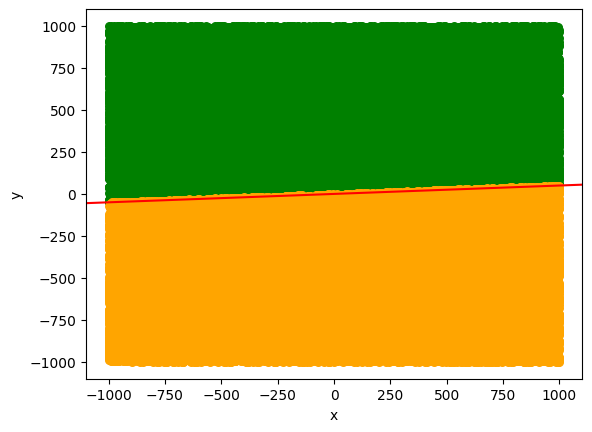

In [39]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [40]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)

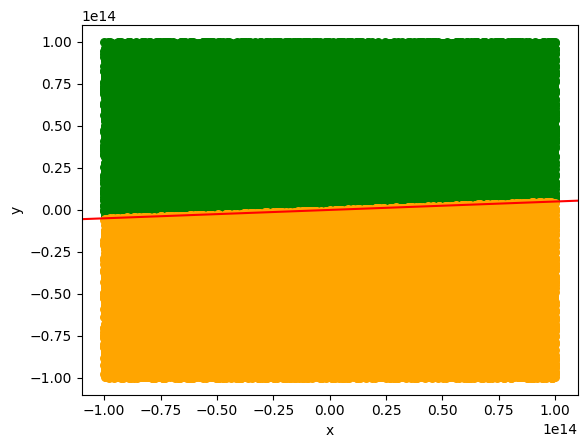

In [41]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [42]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)

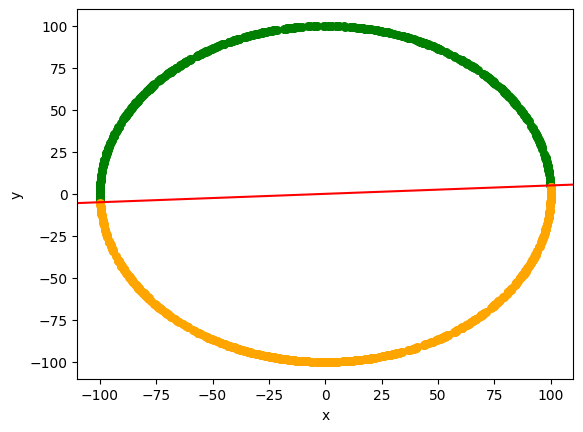

In [43]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [ ]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 0)

In [ ]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [63]:
from time import process_time
def table(data,epsilon,det_funcs,name):
    res=[]
    for mat_det_func in det_funcs:
        start=process_time()
        classified_points_left,classified_points_mid,classified_points_right = categorize_points(data, a, b, mat_det_func, epsilon)
        end=process_time()
        res.append([len(classified_points_left),len(classified_points_mid),len(classified_points_right),(end-start)])
    #left
    print(f"{res[0][0]} \t {res[1][0]} \t {res[2][0]} \t {res[3][0]}")
    #mid
    print(f"{res[0][1]} \t {res[1][1]} \t {res[2][1]} \t {res[3][1]}")
    #right
    print(f"{res[0][2]} \t {res[1][2]} \t {res[2][2]} \t {res[3][2]}")
    #time
    print(f"{res[0][3]} \t {res[1][3]} \t {res[2][3]} \t {res[3][3]}")
    

#[0, 10**-08, 10**-10, 10**-12, 10**-14]
epsilons=[10**-10]
sets=[(points_a,"a"),(points_b,"b"),(points_c,"c"),(points_d,"d")]
det_funcs=[mat_det_2x2,mat_det_2x2_lib,mat_det_3x3,mat_det_3x3_lib]

for s,name in sets:
    for epsilon in epsilons:
        table(s,epsilon,det_funcs,name)

# printing in format suitable for excel table pasting
# columns : {2x2,2x2 lib,3x3,3x3 lib}
# rows per set: {left,mid,right,time}

50315 	 50315 	 50315 	 50315
0 	 0 	 0 	 0
49685 	 49685 	 49685 	 49685
0.02843589999999807 	 0.4227720000000019 	 0.0395476000000059 	 0.41414319999999805
49832 	 49831 	 49834 	 49834
5 	 4 	 0 	 0
50163 	 50165 	 50166 	 50166
0.024284500000000264 	 0.39146829999999966 	 0.03924239999999912 	 0.4189316000000005
495 	 495 	 495 	 495
0 	 0 	 0 	 0
505 	 505 	 505 	 505
0.0002819999999985612 	 0.0037674000000009755 	 0.00038309999999341926 	 0.00458770000000186
0 	 0 	 0 	 0
1000 	 1000 	 1000 	 1000
0 	 0 	 0 	 0
0.00024189999999180145 	 0.003771099999994476 	 0.00036870000000988057 	 0.004088999999993348


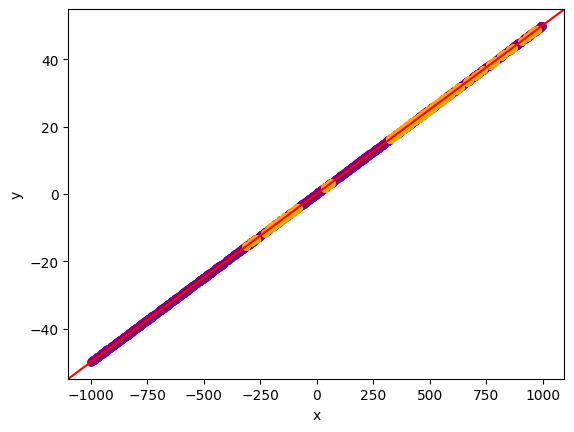

In [91]:

classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_d, a, b, mat_det_2x2, 10**-14)
draw_line(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

In [151]:
def differences(det,epsilon,points):
    l1,m1,r1 = categorize_points(points, a, b, det[0], epsilon[0])
    l2,m2,r2 = categorize_points(points, a, b, det[1], epsilon[1])

    l1,m1,r1,l2,m2,r2=set(l1),set(m1),set(r1),set(l2),set(m2),set(r2)
  
    l=l1.symmetric_difference(l2)
    m=m1.symmetric_difference(m2)
    r=r1.symmetric_difference(r2)
    l.update(m)
    l.update(r)

    return list(l)

Number of differences for 2x2: 3
Number of differences for 3x3: 0


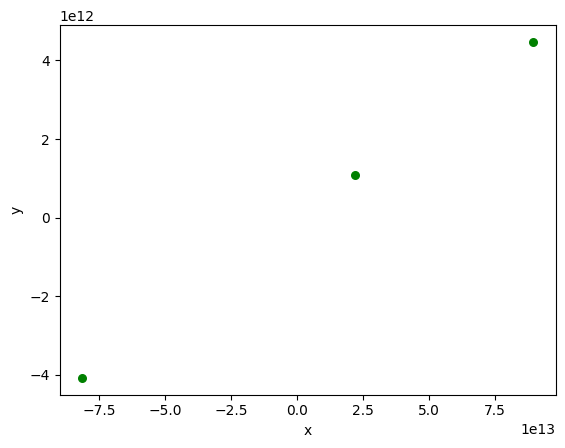

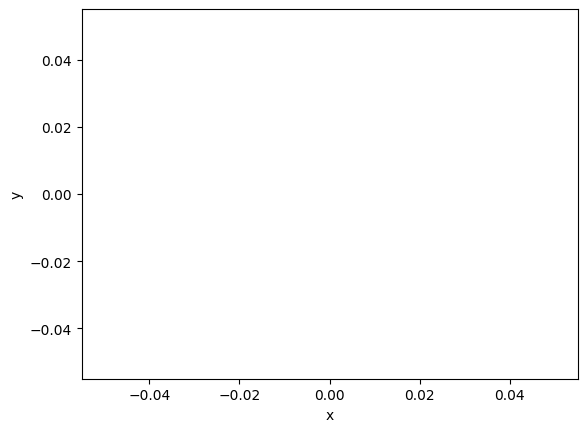

In [157]:
# differences between implemented and imported determinant functions of set b
diff_b=[]
diff_b.append(differences((mat_det_2x2,mat_det_2x2_lib),(10**-14,10**-14),points_b))
diff_b.append(differences((mat_det_3x3,mat_det_3x3_lib),(10**-14,10**-14),points_b))

print(f"Number of differences for 2x2: {len(diff_b[0])}")
print(f"Number of differences for 3x3: {len(diff_b[1])}")
draw_points(diff_b[0])
draw_points(diff_b[1])

Number of differences for 2x2: 388
Number of differences for 3x3: 112


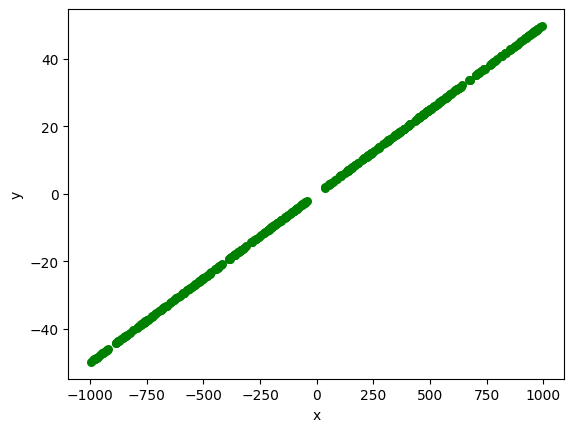

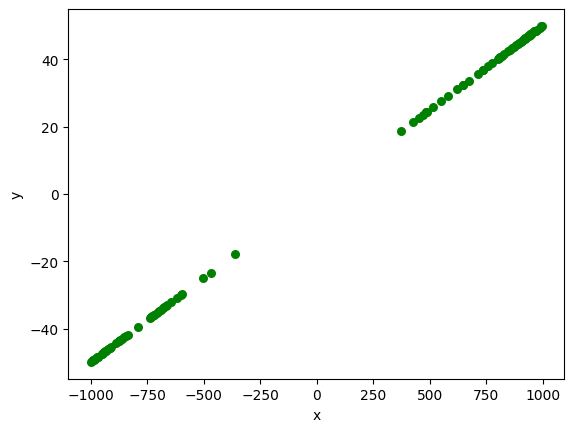

In [158]:
# differences between implemented and imported determinant functions of set d
diff_d=[]
diff_d.append(differences((mat_det_2x2,mat_det_2x2_lib),(10**-14,10**-14),points_d))
diff_d.append(differences((mat_det_3x3,mat_det_3x3_lib),(10**-14,10**-14),points_d))

print(f"Number of differences for 2x2: {len(diff_d[0])}")
print(f"Number of differences for 3x3: {len(diff_d[1])}")
draw_points(diff_d[0])
draw_points(diff_d[1])

Number of differences for 2x2: 12
Number of differences for 3x3: 654


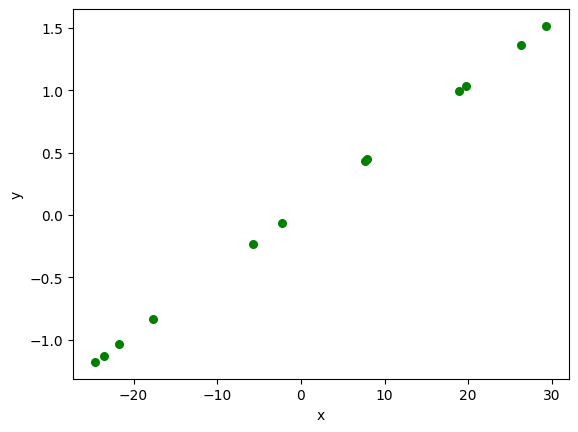

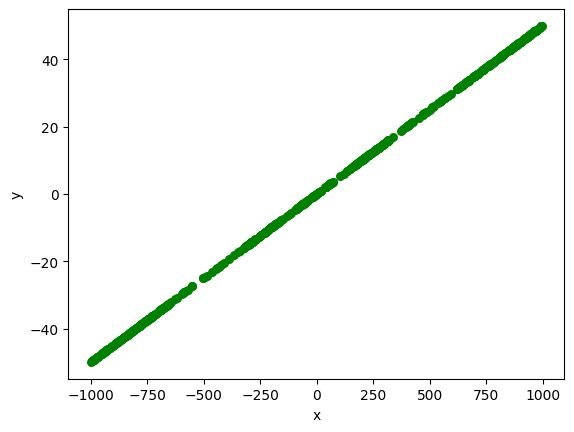

In [159]:
# differences between epsilons

# no differences for sets a,b and c

# for set d:
diff_ep=[]
diff_ep.append(differences((mat_det_2x2,mat_det_2x2),(10**-14,0),points_d))
diff_ep.append(differences((mat_det_3x3,mat_det_3x3),(10**-14,0),points_d))

print(f"Number of differences for 2x2: {len(diff_ep[0])}")
print(f"Number of differences for 3x3: {len(diff_ep[1])}")
draw_points(diff_ep[0])
draw_points(diff_ep[1])

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.
